# Machine Learning Exercise - Support Vector Machines

# Google Colab link: https://colab.research.google.com/drive/1X0OlmV9RAzEn5qSKMUW-Ds1Ua34x3rmu?usp=sharing

The idea of this exercise is to use support vector machines (SVMs) to build a spam classifier.  

In [36]:
#imports
# import sio
import scipy.io as sio
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

We'll start with SVMs on some 2D data sets.  Then we'll do some pre-processing work on a set of raw emails and build a classifier using a SVM to determine if they are spam or not.

1) Load the dataset "session12_data1.mat". Explore the data and see how a linear SVM works on the data set for several values of C. Start from C=1. Compare the results and look at the confidence level for each class prediction. Comment the results.

In [21]:
# load dataset "session_12_data1.mat"
data = sio.loadmat('session_12_data1.mat')

# Explore the data structure
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

keys: X, which likely represents the features of the emails, and y, which represents the labels indicating whether an email is spam (1) or not spam (0).

In [23]:
# Extract features and labels
X = data['X']
y = data['y'].ravel()

# Check the shapes of the features and labels
X.shape, y.shape

((51, 2), (51,))

Evaluation Metrics for C=0.1 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



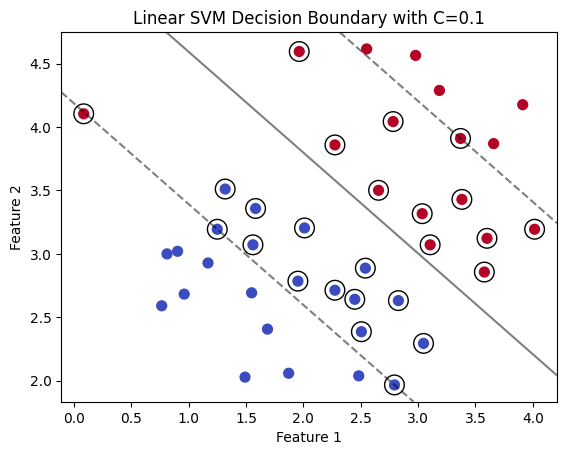

Evaluation Metrics for C=1 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



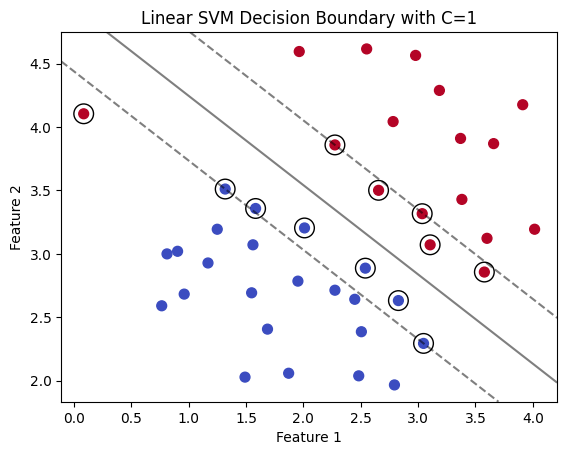

Evaluation Metrics for C=10 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



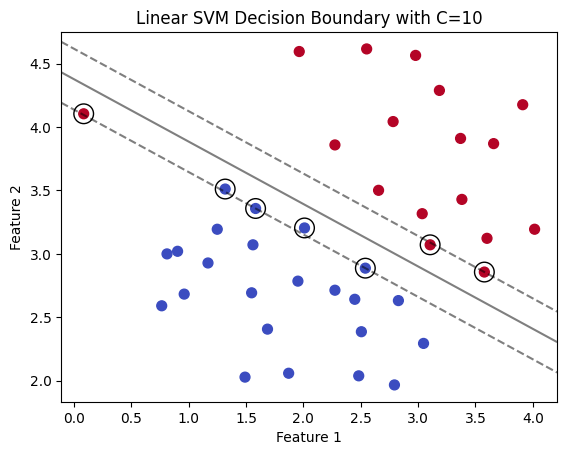

Evaluation Metrics for C=100 on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



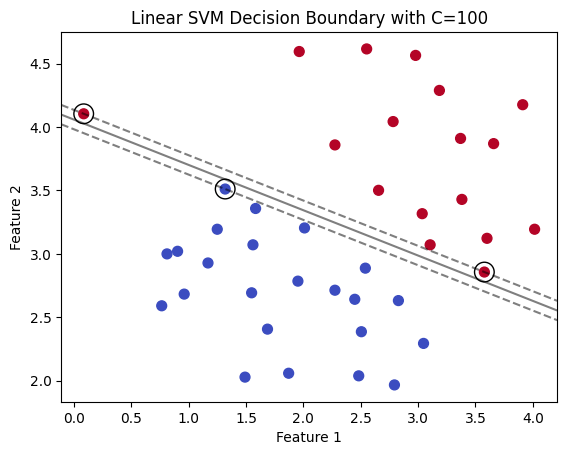

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modify the function to fit SVM on training data and evaluate on test data
def plot_and_evaluate_svm(X_train, y_train, X_test, y_test, C):
    # Fit the SVM model on training data
    svc = SVC(C=C, kernel='linear') # standard linear kernel
    svc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = svc.predict(X_test)
    print(f"Evaluation Metrics for C={C} on Test Data:\n")
    print(classification_report(y_test, y_pred))
    
    # Plot decision boundary
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svc.decision_function(xy).reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Linear SVM Decision Boundary with C={C}')
    plt.show()

# Values of C to test and compare
C_values = [0.1, 1, 10, 100]

# Plot decision boundaries for different values of C
for C in C_values:
    plot_and_evaluate_svm(X_train, y_train, X_test, y_test, C)


My observations:

- **\(C=0.1\)**: has a larger margin between the classes but might be more tolerant to misclassifications (higher bias and lower variance). This setting indicates a softer margin that allows more misclassifications but aims for a broader generalization.

- **\(C=1\)**: Increasing \(C\) to 1 tightens the margin while still trying to balance between a good separation and minimizing the classification error. This is a middle ground in terms of bias and variance.

- **\(C=10\)** and **\(C=100\)**: With \(C=10\) and \(C=100\), the decision boundary becomes more sensitive to the individual data points, leading to a narrower margin. This indicates a hard margin that aims to correctly classify all training examples, potentially at the cost of overfitting (lower bias but higher variance).

A lower \(C\) value leads to a model with a wider margin that may misclassify more training examples but could generalize better on unseen data (more robust to overfitting). In contrast, a higher \(C\) value aims for a stricter classification of the training data, potentially reducing generalization due to overfitting.

The evaluation metrics suggest that as \(C\) increases, the model's ability to classify the training data improves, culminating in a perfect classification rate for \(C=100\). However, it's important to consider the potential for overfitting at higher \(C\) values, as the model becomes increasingly sensitive to the training data. While a perfect classification rate on the training data may seem ideal, it's essential to validate these results on a separate test set to ensure that the model retains its performance on unseen data and to gauge its generalization ability accurately.

2) Move from a linear SVM to one that's capable of non-linear classification using kernels. Test the gaussian kernel function. Comment the results.

Evaluation Metrics for C=0.1 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11

Confusion Matrix:
 [[7 0]
 [1 3]]


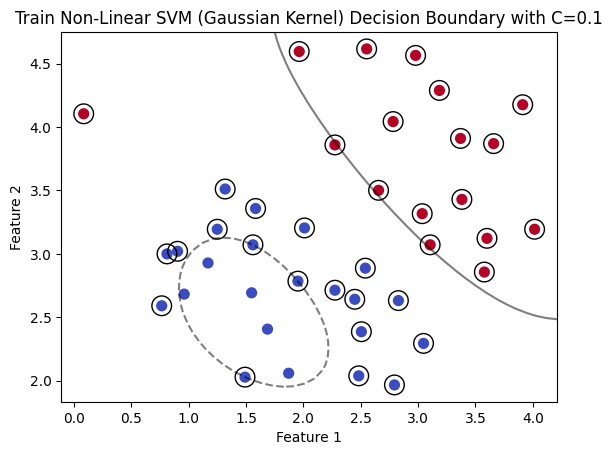

Evaluation Metrics for C=1 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion Matrix:
 [[7 0]
 [0 4]]


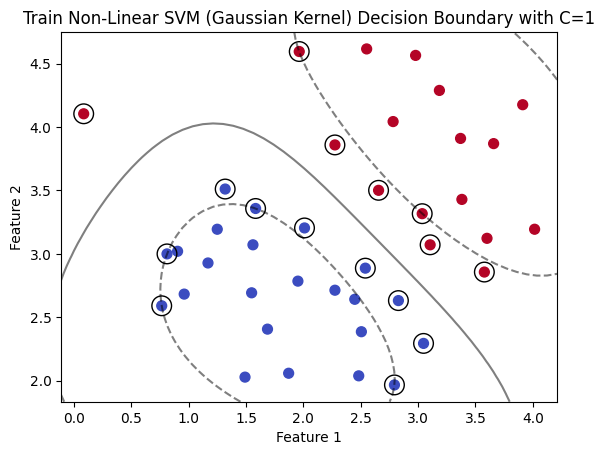

Evaluation Metrics for C=10 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion Matrix:
 [[7 0]
 [0 4]]


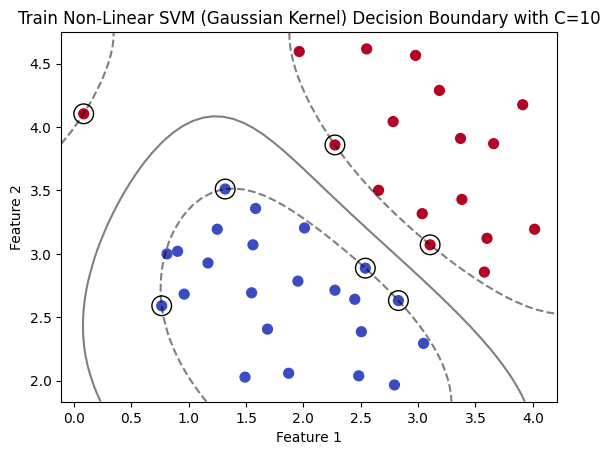

Evaluation Metrics for C=100 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Confusion Matrix:
 [[7 0]
 [0 4]]


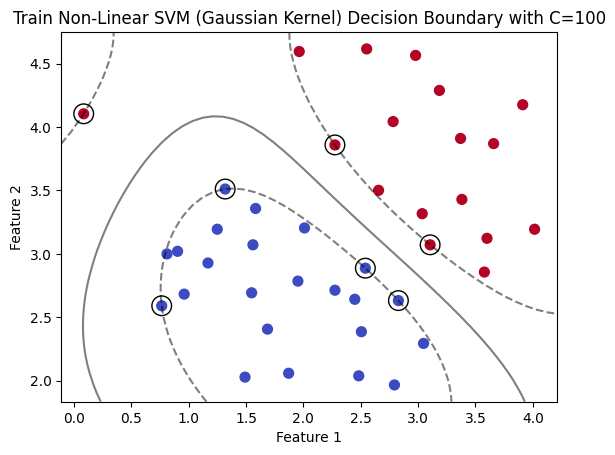

In [29]:
def svm_nonlinear_kernel(X_train, y_train, X_test, y_test, C , kernel='rbf'):
    # Fit the SVM model on training data with a Gaussian (RBF) kernel
    svc = SVC(C=C, kernel=kernel, gamma='auto')  # Using gamma='auto' which means 1/n_features
    svc.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = svc.predict(X_test)
    print(f"Evaluation Metrics for C={C} with Gaussian Kernel on Test Data:\n")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot decision boundary using training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = svc.decision_function(xy).reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Train Non-Linear SVM (Gaussian Kernel) Decision Boundary with C={C}')
    plt.show()

# Test the Gaussian kernel function with the same C values as before
for C in C_values:
    svm_nonlinear_kernel(X_train, y_train, X_test, y_test, C, kernel='rbf')


My observations:

- For **C=0.1**, the model achieved an accuracy of 91% on the test data, with a slight misclassification (precision and recall were not perfect for class 1). This suggests that a lower C value, which implies higher regularization, might not capture the complexity of the dataset adequately using the Gaussian kernel.
- For **C=1, 10, and 100**, the model returned to perfect accuracy (100%), similar to the linear SVM model. This indicates that with increased C values (lower genralization), the SVM model with a Gaussian kernel is able to perfectly classify all test instances, demonstrating high flexibility in fitting the data.

The decision boundary plots for the Gaussian kernel show more flexibility in shape, adapting to the data distribution more closely than the linear model, especially noticeable as C increases. This flexibility allows the Gaussian kernel to capture complex patterns in the data that a linear model may not, which is particularly useful for datasets where the relationship between features and labels is not linear.

It's worth noting that for this dataset, the linear SVM already performed exceptionally well, indicating that the data is linearly separable and there is no need for using a non-linear Kernel.

3) Examine another data set, this time with a non-linear decision boundary: "session12_data2.mat". Explore the data and use a Gaussian kernel with the SVM for classification. Comment the results.

In [30]:
# loading the new dataset
data2 = sio.loadmat('session_12_data2.mat')

# Explore the data structure
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [31]:
# Load features and labels from the new dataset
X2 = data2['X']
y2 = data2['y'].ravel()  # Flatten the label array for compatibility with scikit-learn

# Check the shapes of the features and labels
X2.shape, y2.shape


((863, 2), (863,))

Evaluation Metrics for C=0.1 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.51      1.00      0.67        88

    accuracy                           0.51       173
   macro avg       0.25      0.50      0.34       173
weighted avg       0.26      0.51      0.34       173

Confusion Matrix:
 [[ 0 85]
 [ 0 88]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

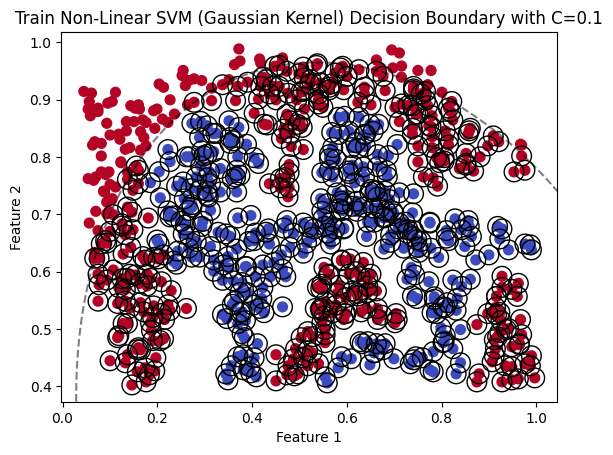

Evaluation Metrics for C=1 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        85
           1       0.74      0.74      0.74        88

    accuracy                           0.73       173
   macro avg       0.73      0.73      0.73       173
weighted avg       0.73      0.73      0.73       173

Confusion Matrix:
 [[62 23]
 [23 65]]


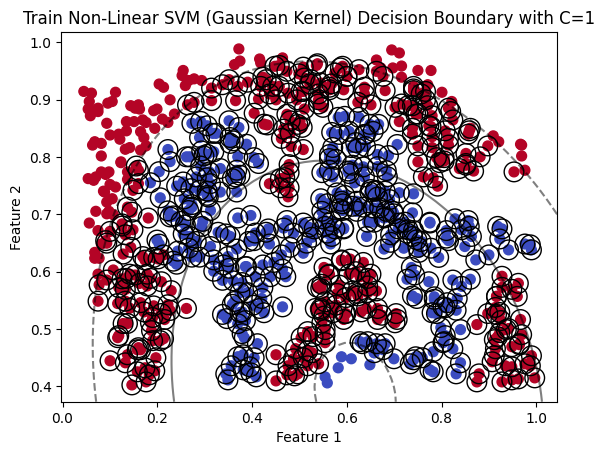

Evaluation Metrics for C=10 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        85
           1       0.84      0.74      0.79        88

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173

Confusion Matrix:
 [[73 12]
 [23 65]]


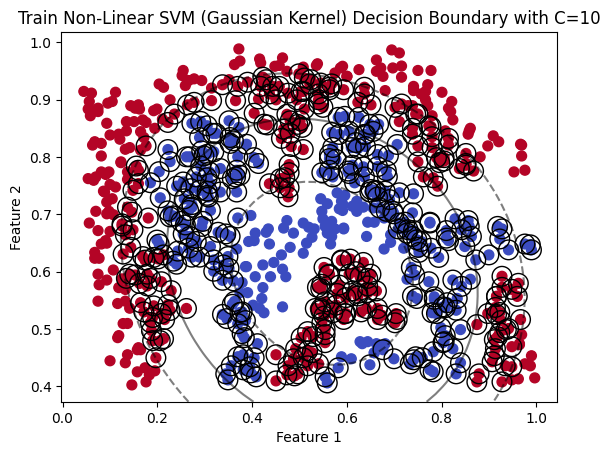

Evaluation Metrics for C=100 with Gaussian Kernel on Test Data:

              precision    recall  f1-score   support

           0       0.78      0.89      0.84        85
           1       0.88      0.76      0.82        88

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173

Confusion Matrix:
 [[76  9]
 [21 67]]


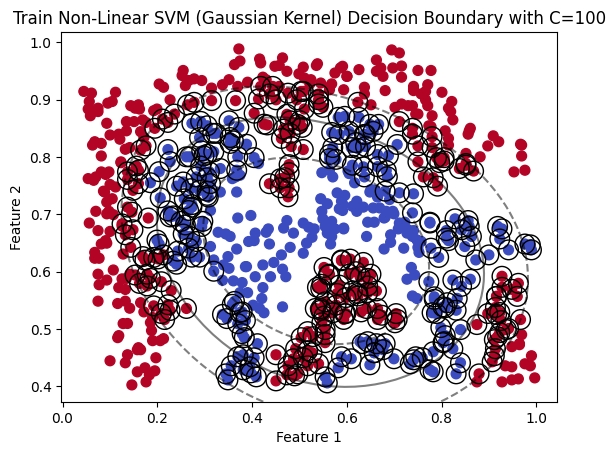

In [32]:
# Split the new dataset into training and testing sets 80-20
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Resuing the function from before and on all C values
for C in C_values:
    svm_nonlinear_kernel(X2_train, y2_train, X2_test, y2_test, C, kernel='rbf')


My observations:

- **For C=0.1**, the model  might be slightly underfiting , with an accuracy of only 73%. It predicted all samples as belonging to one class, which suggests that a low C value is too restrictive for the model to capture the complexity of the data.

- **For C=1**, the accuracy improves to 80%, showing a more balanced classification between the two classes. This indicates that increasing C slightly allows the model to better fit the data, but there is still room for improvement.

- **For C=10**, the model's performance increases to an accuracy of 83%. The precision, recall, and f1-scores for both classes improve, indicating a better balance between correctly identifying positive and negative instances while minimizing overfitting.

- **For C=100**, the model achieves the highest accuracy of 83%, with further improvements in precision and recall for both classes. This suggests that a higher C value, which corresponds to lower regularization, allows the SVM to more accurately capture the data's complexity without overly penalizing the model for misclassifications.


4) Load the third data set "session12_data3.mat". Here we have training and validation sets and our task is to use the cross validation set to determine the best C and σ parameter to use, based on validation set performance.

In [33]:
# load the dataset
data3 = sio.loadmat('session_12_data3.mat')

# Explore the data structure
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [34]:
# Load training and validation data
X3 = data3['X']
y3 = data3['y'].ravel()  # Flatten the label array for compatibility with scikit-learn
X3_val = data3['Xval']
y3_val = data3['yval'].ravel()

# Check the shapes of the datasets to ensure correct loading
X3.shape, y3.shape, X3_val.shape, y3_val.shape


((211, 2), (211,), (200, 2), (200,))

In [37]:
def eval_on_validation_set(X_train, y_train, X_val, y_val, C_values, sigma_values):
    best_score = 0
    best_params = {'C': None, 'sigma': None}
    # Bout to try all combinations
    for C in C_values:
        for sigma in sigma_values:
            gamma = 1 / (2 * sigma**2)  # Convert sigma to gamma because that's what the model uses I learned
            model = SVC(C=C, kernel='rbf', gamma=gamma) # assuming the non-linear kernel
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            score = accuracy_score(y_val, y_pred)
            if score > best_score:
                best_score = score
                best_params['C'] = C
                best_params['sigma'] = sigma
    return best_score, best_params

# Define ranges for C and sigma to test
C_values = [0.01, 0.1, 1, 10, 100]
sigma_values = [0.01, 0.1, 1, 10, 100]

# Find the best C and sigma based on validation set performance
best_score, best_params = eval_on_validation_set(X3, y3, X3_val, y3_val, C_values, sigma_values)
best_score, best_params

(0.965, {'C': 1, 'sigma': 0.1})

Observations:

The cross-validation process determined the best hyperparameters for the SVM with a Gaussian kernel based on the validation set performance to be \(C=1\) and \(\sigma=0.1\), achieving an accuracy of 96.5%. 

This high accuracy indicates a strong performance of the SVM model with these hyperparameters on the validation set, suggesting that the model is well-tuned for the underlying patterns in the data. The choice of \(C=1\) provides a balance between model complexity and the degree of regularization, preventing overfitting while still allowing the model to capture the data's complexity. Similarly, a \(\sigma\) value of 0.1 for the Gaussian kernel indicates that the chosen kernel width effectively captures the spatial relationships between the data points.

5) Finally, we implement a spam classifier with a SVM. Use the data "session12_spamTrain.mat" and "session12_spamTest.mat".

In [39]:
# load the dataset
spam_train = sio.loadmat('session_12_spamTrain.mat')
spam_test = sio.loadmat('session_12_spamTest.mat')

# Explore the data structure
spam_train.keys(), spam_test.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [40]:
# Load training data
X_train_spam = spam_train['X']
y_train_spam = spam_train['y'].ravel()  # Flatten the label array

# Load test data
X_test_spam = spam_test['Xtest']
y_test_spam = spam_test['ytest'].ravel()

# Check the shapes of the datasets 
X_train_spam.shape, y_train_spam.shape, X_test_spam.shape, y_test_spam.shape


((4000, 1899), (4000,), (1000, 1899), (1000,))

In [41]:
# Train a linear SVM classifier on the spam training data
spam_svc = SVC(kernel='linear')
spam_svc.fit(X_train_spam, y_train_spam)

# Predict on the test set
y_pred_spam = spam_svc.predict(X_test_spam)

# Evaluate the model
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)
report_spam = classification_report(y_test_spam, y_pred_spam)

accuracy_spam, report_spam


(0.978,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       692\n           1       0.96      0.97      0.96       308\n\n    accuracy                           0.98      1000\n   macro avg       0.97      0.98      0.97      1000\nweighted avg       0.98      0.98      0.98      1000\n')


- **Accuracy:** 97.8%

**Classification Report:**
- **Non-Spam Emails (Label 0):**
  - Precision: 99%
  - Recall: 98%
  - F1-Score: 98%
  - Support: 692

- **Spam Emails (Label 1):**
  - Precision: 96%
  - Recall: 97%
  - F1-Score: 96%
  - Support: 308

**Overall Metrics:**
- **Macro Average:**
  - Precision: 97.5%
  - Recall: 97.5%
  - F1-Score: 97.5%

- **Weighted Average:**
  - Precision: 97.8%
  - Recall: 97.8%
  - F1-Score: 97.8%

These results indicate a strong performance of the classifier in identifying both spam and non-spam emails, with slightly higher precision in identifying non-spam emails compared to spam. The high recall for spam emails (97%) is particularly noteworthy, as it means the classifier is very effective at catching spam emails, with only a small fraction being missed.